In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Membaca dataset seattle-weather dan menampilkan 15 baris data teratas
df = pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')
df.head(15)

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain
5,2012-01-06,2.5,4.4,2.2,2.2,rain
6,2012-01-07,0.0,7.2,2.8,2.3,rain
7,2012-01-08,0.0,10.0,2.8,2.0,sun
8,2012-01-09,4.3,9.4,5.0,3.4,rain
9,2012-01-10,1.0,6.1,0.6,3.4,rain


In [22]:
df = pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')

# Tampilkan dataset sebelum penghapusan
print("Dataset sebelum penghapusan:")
print(df)

# Hapus baris yang memiliki nilai yang hilang
df_cleaned_rows = df.dropna()
print("\nDataset setelah menghapus baris yang memiliki nilai yang hilang:")
print(df_cleaned_rows)

# Hapus kolom yang memiliki nilai yang hilang
df_cleaned_cols = df.dropna(axis=1)
print("\nDataset setelah menghapus kolom yang memiliki nilai yang hilang:")
print(df_cleaned_cols)

# Hapus kolom date
df = pd.read_csv('/content/drive/MyDrive/seattle-weather.csv')
df.drop(columns=['date'],inplace=True)
print("\nDataset setelah menghapus kolom date:")
print(df)

# Mengecek dan menghapus data duplikat
duplicate_values = df.duplicated()
print(duplicate_values)
df = df.drop_duplicates()
print(df)

Dataset sebelum penghapusan:
            date  precipitation  temp_max  temp_min  wind  weather
0     2012-01-01            0.0      12.8       5.0   4.7  drizzle
1     2012-01-02           10.9      10.6       2.8   4.5     rain
2     2012-01-03            0.8      11.7       7.2   2.3     rain
3     2012-01-04           20.3      12.2       5.6   4.7     rain
4     2012-01-05            1.3       8.9       2.8   6.1     rain
...          ...            ...       ...       ...   ...      ...
1456  2015-12-27            8.6       4.4       1.7   2.9     rain
1457  2015-12-28            1.5       5.0       1.7   1.3     rain
1458  2015-12-29            0.0       7.2       0.6   2.6      fog
1459  2015-12-30            0.0       5.6      -1.0   3.4      sun
1460  2015-12-31            0.0       5.6      -2.1   3.5      sun

[1461 rows x 6 columns]

Dataset setelah menghapus baris yang memiliki nilai yang hilang:
            date  precipitation  temp_max  temp_min  wind  weather
0     201

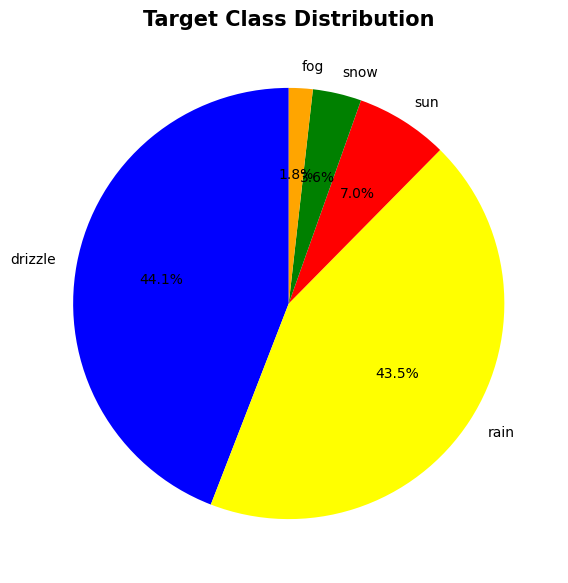

In [23]:
# visualisasi distribusi target-class
plt.figure(figsize=(7, 7))
plt.pie(df['weather'].value_counts(), labels= df['weather'].unique(), autopct='%1.1f%%', colors=['blue', 'yellow', 'red', 'green', 'orange'], startangle=90)
plt.title("Target Class Distribution", fontsize=15, fontweight="bold")
plt.show()

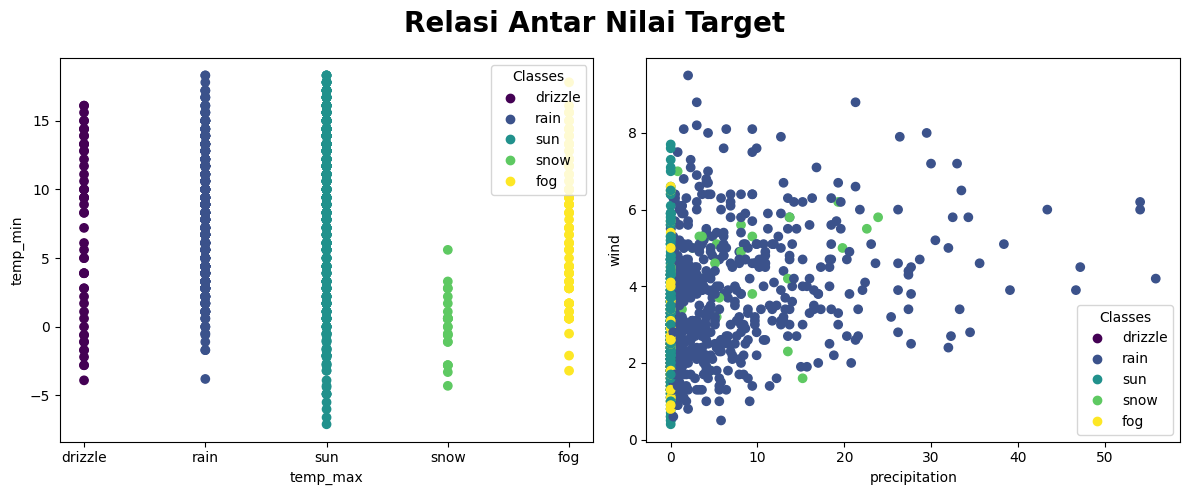

In [24]:
target_names= df['weather'].unique()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
target = df['weather'].replace({
'drizzle': 0,
'rain': 1,
'sun' : 2,
'snow': 3,
'fog': 4
})
# Visualisasi relasi fitur temp_max dan temp_min
a_scatter =axs[0].scatter(df['weather'], df['temp_min'],
c=target)
axs[0].set(xlabel="temp_max", ylabel="temp_min")
axs[0].legend(a_scatter.legend_elements()[0], target_names, loc="upper right", title="Classes")
# Visualisasi relasi fitur precipitation dan wind
b_scatter = axs[1].scatter(df['precipitation'], df['wind'],
c=target)
axs[1].set(xlabel="precipitation", ylabel="wind")
axs[1].legend(b_scatter.legend_elements()[0], target_names,
loc="lower right", title="Classes")
fig = fig.suptitle("Relasi Antar Nilai Target", fontsize=20,
fontweight="bold")
plt.tight_layout()

In [25]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df['weather']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

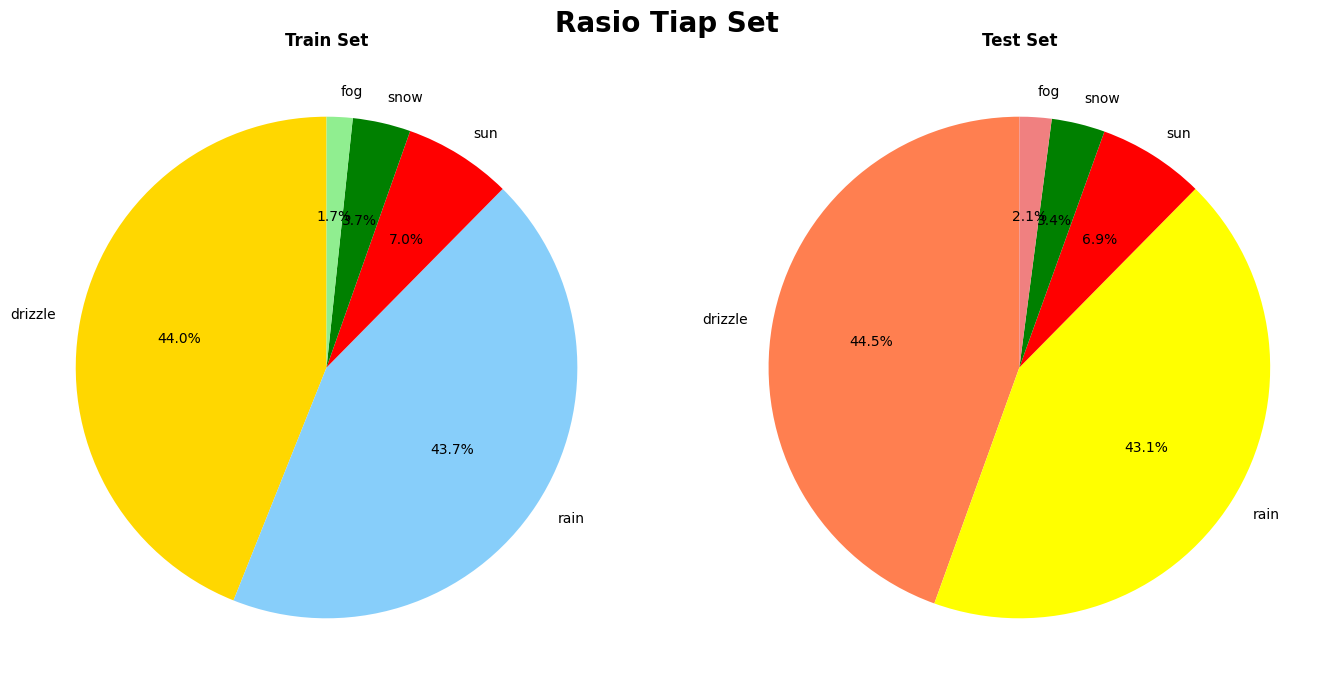

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
sw_df = df['weather'].unique()
colors1 = ['gold', 'lightskyblue', 'red', 'green', 'lightgreen']
colors2 = ['coral', 'yellow', 'red', 'green', 'lightcoral']
#Train dataset
axs[0].pie(y_train.value_counts(), labels=sw_df, colors=colors1, autopct='%1.1f%%', startangle=90)
axs[0].set_title("Train Set", fontweight="bold")
#Test dataset
axs[1].pie(y_test.value_counts(), labels=sw_df, colors=colors2, autopct='%1.1f%%', startangle=90)
axs[1].set_title("Test Set", fontweight="bold")
fig = fig.suptitle("Rasio Tiap Set", fontsize=20, fontweight="bold")
plt.tight_layout()

In [27]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

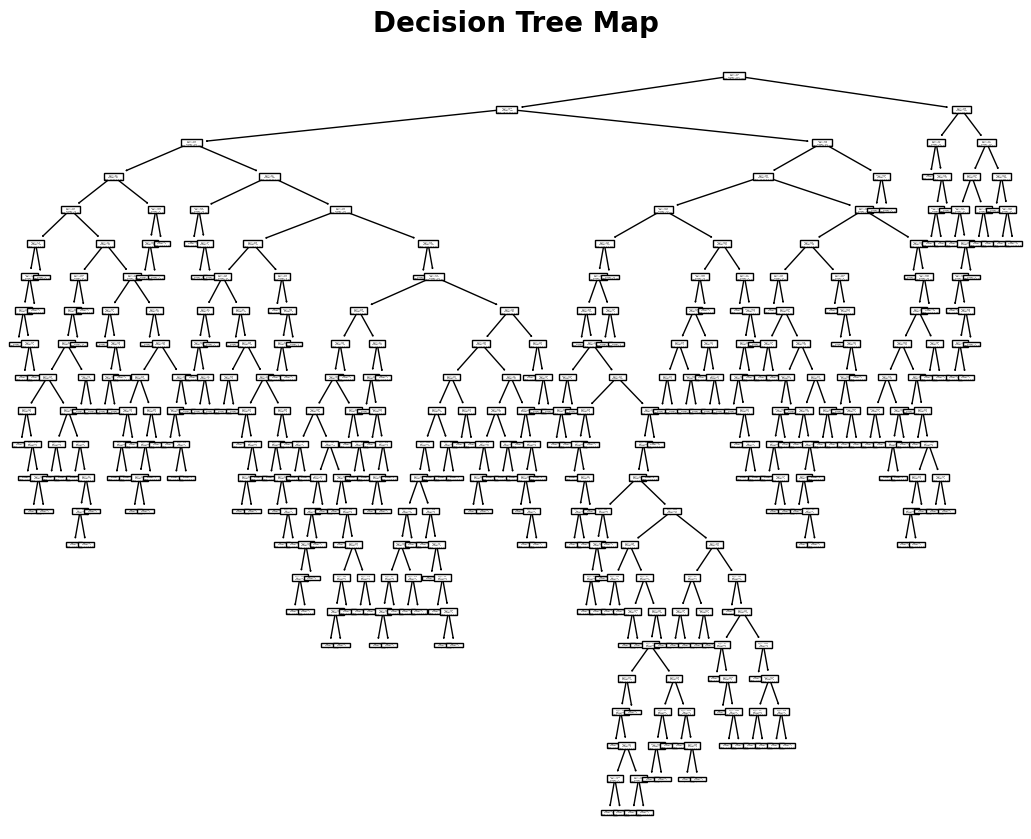

In [28]:
import sklearn.tree as tree

plt.figure(figsize=(13, 10))
tree.plot_tree(decision_tree)
plt.title("Decision Tree Map", fontsize=20, fontweight="bold", pad=20)
plt.show()

In [29]:
from sklearn.metrics import accuracy_score

y_pred = decision_tree.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Akurasi Model : {:.1f}%".format(accuracy * 100))

Akurasi Model : 75.9%


Kesimpulan dari project ini adalah mengambil data manual yang memiliki terdiri 15 data teratas, yang mencari target nilai dari weather, yakni : drizzel, fog, sun, snow dan rain. Disini saya menggunakan algoritma Decision Tree dengan memiliki sebuah nilai akurasi model : 74,3%.